In [1]:
import h2o

In [15]:
h2o.connect()

Connecting to H2O server at http://localhost:54321... successful.


H2O cluster uptime:,09 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,5 months and 29 days !!!
H2O cluster name:,chaocheng
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


<H2OConnection to http://localhost:54321, no session>

In [57]:
h2o_train_1 = h2o.import_file('./train-12100-data-subject.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [58]:
h2o_train_2 = h2o.import_file('./traing-28236-data-subject.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [59]:
h2o_total_pre = h2o_train_1.rbind(h2o_train_2)

In [60]:
h2o_total_pre.shape

(1208972, 42)

In [61]:
h2o_names = h2o.import_file('./psv_combine.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [62]:
column_names = h2o_names.columns

In [63]:
column_names

[u'HR',
 u'O2Sat',
 u'Temp',
 u'SBP',
 u'MAP',
 u'DBP',
 u'Resp',
 u'EtCO2',
 u'BaseExcess',
 u'HCO3',
 u'FiO2',
 u'pH',
 u'PaCO2',
 u'SaO2',
 u'AST',
 u'BUN',
 u'Alkalinephos',
 u'Calcium',
 u'Chloride',
 u'Creatinine',
 u'Bilirubin_direct',
 u'Glucose',
 u'Lactate',
 u'Magnesium',
 u'Phosphate',
 u'Potassium',
 u'Bilirubin_total',
 u'TroponinI',
 u'Hct',
 u'Hgb',
 u'PTT',
 u'WBC',
 u'Fibrinogen',
 u'Platelets',
 u'Age',
 u'Gender',
 u'Unit1',
 u'Unit2',
 u'HospAdmTime',
 u'ICULOS',
 u'SepsisLabel',
 u'id']

In [64]:
h2o_total_pre.set_names(column_names)

HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id
97,95,nan,98,75.33,nan,19,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,2,0,1
89,99,nan,122,86,nan,22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,3,0,1
90,95,nan,nan,nan,nan,30,nan,24,nan,nan,7.36,100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,4,0,1
103,88.5,nan,122,91.33,nan,24.5,nan,nan,nan,0.28,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,5,0,1
110,91,nan,nan,nan,nan,22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,6,0,1
108,92,36.11,123,77,nan,29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,7,0,1
106,90.5,nan,93,76.33,nan,29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,8,0,1
104,95,nan,133,88.33,nan,26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,9,0,1
102,91,nan,134,87.33,nan,30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,10,0,1
104,92,37.17,138,86.67,nan,19,nan,23,nan,nan,7.4,86,88,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.14,0,nan,nan,-0.03,11,0,1


In [66]:
train_features = set(h2o_total_pre.columns)-set(['Unit1','Unit2','HospAdmTime','ICULOS','id','SepsisLabel'])

In [67]:
train_features

{u'AST',
 u'Age',
 u'Alkalinephos',
 u'BUN',
 u'BaseExcess',
 u'Bilirubin_direct',
 u'Bilirubin_total',
 u'Calcium',
 u'Chloride',
 u'Creatinine',
 u'DBP',
 u'EtCO2',
 u'FiO2',
 u'Fibrinogen',
 u'Gender',
 u'Glucose',
 u'HCO3',
 u'HR',
 u'Hct',
 u'Hgb',
 u'Lactate',
 u'MAP',
 u'Magnesium',
 u'O2Sat',
 u'PTT',
 u'PaCO2',
 u'Phosphate',
 u'Platelets',
 u'Potassium',
 u'Resp',
 u'SBP',
 u'SaO2',
 u'Temp',
 u'TroponinI',
 u'WBC',
 u'pH'}

In [71]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o_total_pre['SepsisLabel']=h2o_total_pre['SepsisLabel'].asfactor()
h2o_train = h2o_total_pre[h2o_total_pre['id']<24000]
h2o_test = h2o_total_pre[h2o_total_pre['id']>=24000]

In [73]:
gbm = H2OGradientBoostingEstimator( quantile_alpha=0.8)
gbm.train(x=train_features, y="SepsisLabel", training_frame=h2o_train)
gbm.predict(h2o_test)
gbm_perf = gbm.model_performance(h2o_test)
gbm_perf

gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0138271339828
RMSE: 0.117588834431
LogLoss: 0.0710719002779
Mean Per-Class Error: 0.35282365808
AUC: 0.681946059868
Gini: 0.363892119736
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0413999202455: 


,0,1,Error,Rate
0,337946.0,13438.0,0.0382,(13438.0/351384.0)
1,4028.0,934.0,0.8118,(4028.0/4962.0)
Total,341974.0,14372.0,0.049,(17466.0/356346.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0413999,0.0966174,239.0
max f2,0.0311615,0.1493734,265.0
max f0point5,0.0577374,0.0791659,211.0
max accuracy,0.9805033,0.9860725,0.0
max precision,0.8344244,0.1351351,13.0
max recall,0.0039857,1.0,399.0
max specificity,0.9805033,0.9999972,0.0
max absolute_mcc,0.0318426,0.0926111,263.0
max min_per_class_accuracy,0.0171294,0.6359681,327.0
max mean_per_class_accuracy,0.0194910,0.6471763,312.0


Gains/Lift Table: Avg response rate:  1.39 %, avg score:  1.88 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100015,0.0815337,5.6218808,5.6218808,0.0782828,0.1618961,0.0782828,0.1618961,0.0562273,0.0562273,462.1880840,462.1880840
,2,0.0200002,0.0560243,4.9986299,5.3102991,0.0696043,0.0666979,0.0739442,0.1143037,0.0499798,0.1062072,399.8629947,431.0299118
,3,0.0300017,0.0459725,4.2919735,4.9708255,0.0597643,0.0502241,0.0692171,0.0929418,0.0429262,0.1491334,329.1973544,397.0825510
,4,0.0400004,0.0413591,3.7086609,4.6553286,0.0516419,0.0436118,0.0648239,0.0806110,0.0370818,0.1862152,270.8660928,365.5328639
,5,0.0500020,0.0377282,3.1635674,4.3569429,0.0440516,0.0394841,0.0606690,0.0723847,0.0316405,0.2178557,216.3567354,335.6942893
,6,0.1000572,0.0284771,2.1741378,3.2649588,0.0302741,0.0321562,0.0454635,0.0522598,0.1088271,0.3266828,117.4137845,226.4958777
,7,0.1500087,0.0244510,1.7348566,2.7554495,0.0241573,0.0263486,0.0383687,0.0436316,0.0866586,0.4133414,73.4856596,175.5449492
,8,0.2000051,0.0217002,1.3302059,2.3991736,0.0185227,0.0230186,0.0334077,0.0384789,0.0665054,0.4798468,33.0205883,139.9173585
,9,0.3004187,0.0184543,1.0576967,1.9507908,0.0147281,0.0198292,0.0271641,0.0322453,0.1062072,0.5860540,5.7696658,95.0790752
,10,0.4004002,0.0165381,0.7316954,1.6463779,0.0101886,0.0174255,0.0229253,0.0285447,0.0731560,0.6592100,-26.8304625,64.6377901


In [77]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1556196344653_19


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0187619888266
RMSE: 0.136974409386
LogLoss: 0.0892000298299
Mean Per-Class Error: 0.322437411946
AUC: 0.751482728818
Gini: 0.502965457636
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.092168303571: 


,0,1,Error,Rate
0,830260.0,4353.0,0.0052,(4353.0/834613.0)
1,15213.0,2799.0,0.8446,(15213.0/18012.0)
Total,845473.0,7152.0,0.0229,(19566.0/852625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0921683,0.2224607,187.0
max f2,0.0427713,0.2298555,254.0
max f0point5,0.1652578,0.3562323,146.0
max accuracy,0.2006784,0.9806949,136.0
max precision,0.9818977,1.0,0.0
max recall,0.0073727,1.0,393.0
max specificity,0.9818977,1.0,0.0
max absolute_mcc,0.2006784,0.2931388,136.0
max min_per_class_accuracy,0.0195491,0.6761603,327.0
max mean_per_class_accuracy,0.0198185,0.6775626,326.0


Gains/Lift Table: Avg response rate:  2.11 %, avg score:  2.12 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100009,0.0856730,16.2821565,16.2821565,0.3439662,0.2196536,0.3439662,0.2196536,0.1628359,0.1628359,1528.2156481,1528.2156481
,2,0.0200006,0.0655360,4.3583334,10.3205946,0.0920713,0.0743528,0.2180262,0.1470075,0.0435821,0.2064179,335.8333432,932.0594567
,3,0.0300003,0.0556213,3.0147453,7.8854067,0.0636875,0.0602254,0.1665820,0.1180812,0.0301466,0.2365645,201.4745291,688.5406682
,4,0.04,0.0490556,2.7315924,6.5969909,0.0577058,0.0521205,0.1393637,0.1015915,0.0273151,0.2638796,173.1592419,559.6990895
,5,0.0500032,0.0448321,2.6085302,5.7990929,0.0551061,0.0467398,0.1225079,0.0906184,0.0260937,0.2899734,160.8530192,479.9092942
,6,0.1000006,0.0333155,2.0387485,3.9190310,0.0430693,0.0381906,0.0827909,0.0644060,0.1019320,0.3919054,103.8748508,291.9030982
,7,0.1500015,0.0279092,1.6144508,3.1508316,0.0341058,0.0303310,0.0665624,0.0530476,0.0807240,0.4726294,61.4450833,215.0831593
,8,0.2000023,0.0246106,1.3590700,2.7028886,0.0287108,0.0261069,0.0570995,0.0463124,0.0679547,0.5405841,35.9070028,170.2888575
,9,0.3000041,0.0203629,1.0626062,2.1561257,0.0224479,0.0223720,0.0455489,0.0383322,0.1062625,0.6468465,6.2606223,115.6125653
,10,0.4000235,0.0177094,0.9136584,1.8454669,0.0193014,0.0189177,0.0389861,0.0334779,0.0913835,0.7382301,-8.6341590,84.5466949



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-27 15:39:56,0.015 sec,0.0,0.1438022,0.1023870,0.5,0.0,1.0,0.9788747
,2019-04-27 15:39:57,0.842 sec,1.0,0.1431142,0.1009524,0.6083529,0.0583449,4.0477698,0.0486380
,2019-04-27 15:39:57,1.442 sec,2.0,0.1426029,0.0999067,0.6397379,0.0756424,4.9179260,0.0560516
,2019-04-27 15:39:58,2.045 sec,3.0,0.1423374,0.0991272,0.6518899,0.0866111,6.0055643,0.0471579
,2019-04-27 15:39:58,2.626 sec,4.0,0.1420910,0.0984411,0.6666344,0.0939759,7.5399980,0.0381868
,2019-04-27 15:39:59,3.192 sec,5.0,0.1418980,0.0979758,0.6772762,0.0984816,8.6833484,0.0360545
,2019-04-27 15:40:00,3.755 sec,6.0,0.1416735,0.0974612,0.6817824,0.1040761,9.2619713,0.0330016
,2019-04-27 15:40:04,7.962 sec,16.0,0.1399953,0.0940861,0.7141259,0.1415361,12.1793731,0.0290022
,2019-04-27 15:40:08,12.295 sec,26.0,0.1388164,0.0920724,0.7301251,0.1633859,13.6714112,0.0290655
,2019-04-27 15:40:12,16.361 sec,35.0,0.1379495,0.0907227,0.7408732,0.1801057,14.9220718,0.0238569


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Hct,842.5102539,1.0,0.1624114
WBC,790.6740112,0.9384741,0.1524189
Temp,746.4307861,0.8859605,0.1438901
Platelets,692.0050049,0.8213609,0.1333984
Fibrinogen,208.7261353,0.2477431,0.0402363
---,---,---,---
AST,0.0,0.0,0.0
Creatinine,0.0,0.0,0.0
Magnesium,0.0,0.0,0.0
TroponinI,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [74]:
predit= gbm.predict(h2o_total_pre)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [75]:
h2o_first_gbm = h2o_total_pre.cbind(predit)

In [76]:
h2o.export_file(h2o_first_gbm,'/Users/chaocheng/GaTech/bd4h/project/first_gbm_with_predict.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


In [78]:
from h2o.estimators import H2ORandomForestEstimator
rf = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)
rf.train(x=train_features, y="SepsisLabel", training_frame=h2o_train)
rf.predict(h2o_test)
rf_perf =rf.model_performance(h2o_test)
rf_perf

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0136647737586
RMSE: 0.116896423207
LogLoss: 0.0705516388683
Mean Per-Class Error: 0.346080915043
AUC: 0.689079334121
Gini: 0.378158668242
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0498968817994: 


,0,1,Error,Rate
0,339701.0,11683.0,0.0332,(11683.0/351384.0)
1,4165.0,797.0,0.8394,(4165.0/4962.0)
Total,343866.0,12480.0,0.0445,(15848.0/356346.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0498969,0.0913886,201.0
max f2,0.0280771,0.1463471,262.0
max f0point5,0.0602501,0.0761228,182.0
max accuracy,0.4957509,0.9860753,1.0
max precision,0.4957509,0.5,1.0
max recall,0.0018278,1.0,399.0
max specificity,0.5148700,0.9999972,0.0
max absolute_mcc,0.0277962,0.0907306,263.0
max min_per_class_accuracy,0.0160118,0.6509574,322.0
max mean_per_class_accuracy,0.0177087,0.6539191,312.0


Gains/Lift Table: Avg response rate:  1.39 %, avg score:  1.87 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100015,0.0964180,5.3196292,5.3196292,0.0740741,0.1463947,0.0740741,0.1463947,0.0532044,0.0532044,431.9629182,431.9629182
,2,0.0200002,0.0686586,4.6559819,4.9878521,0.0648330,0.0807292,0.0694542,0.1135665,0.0465538,0.0997582,365.5981926,398.7852113
,3,0.0300017,0.0546376,4.3121237,4.7625882,0.0600449,0.0613743,0.0663175,0.0961675,0.0431278,0.1428859,331.2123655,376.2588225
,4,0.0400004,0.0461185,3.1442995,4.3580728,0.0437833,0.0499835,0.0606847,0.0846231,0.0314389,0.1743249,214.4299483,335.8072806
,5,0.0500020,0.0406555,3.3449183,4.1554192,0.0465769,0.0432290,0.0578628,0.0763433,0.0334543,0.2077791,234.4918349,315.5419170
,6,0.1000011,0.0302493,2.2612231,3.2083477,0.0314868,0.0344616,0.0446752,0.0554031,0.1130593,0.3208384,126.1223080,220.8347702
,7,0.1500003,0.0249700,1.8420302,2.7529171,0.0256497,0.0268604,0.0383335,0.0458890,0.0921000,0.4129383,84.2030209,175.2917059
,8,0.2000022,0.0216655,1.5114279,2.4425361,0.0210461,0.0235372,0.0340115,0.0403009,0.0755744,0.4885127,51.1427923,144.2536065
,9,0.3000006,0.0170127,1.1306115,2.0052361,0.0157434,0.0189746,0.0279222,0.0331923,0.1130593,0.6015719,13.0611540,100.5236071
,10,0.4010428,0.0152566,0.8157622,1.7055496,0.0113592,0.0160042,0.0237492,0.0288618,0.0824264,0.6839984,-18.4237835,70.5549573


In [79]:
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1556196344653_35


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.0203715634333
RMSE: 0.14272898596
LogLoss: 0.0984335941383
Mean Per-Class Error: 0.368451551999
AUC: 0.677764175798
Gini: 0.355528351596
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0427569828618: 


,0,1,Error,Rate
0,787850.0,46763.0,0.056,(46763.0/834613.0)
1,14455.0,3557.0,0.8025,(14455.0/18012.0)
Total,802305.0,50320.0,0.0718,(61218.0/852625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0427570,0.1041093,217.0
max f2,0.0331620,0.1646109,245.0
max f0point5,0.0997860,0.1023439,133.0
max accuracy,0.4230675,0.9789040,20.0
max precision,0.7495980,1.0,0.0
max recall,0.0000850,1.0,399.0
max specificity,0.7495980,1.0,0.0
max absolute_mcc,0.0345670,0.0906344,240.0
max min_per_class_accuracy,0.0171431,0.6288030,313.0
max mean_per_class_accuracy,0.0192437,0.6315484,302.0


Gains/Lift Table: Avg response rate:  2.11 %, avg score:  2.04 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100021,0.0952381,5.8504537,5.8504537,0.1235929,0.1466875,0.1235929,0.1466875,0.0585165,0.0585165,485.0453656,485.0453656
,2,0.0200006,0.0698168,3.1594683,4.5051977,0.0667449,0.0801669,0.0951739,0.1134331,0.0315901,0.0901066,215.9468305,350.5197682
,3,0.0300003,0.0593349,2.9370171,3.9824912,0.0620455,0.0641422,0.0841315,0.0970034,0.0293693,0.1194759,193.7017052,298.2491241
,4,0.04,0.0516442,2.5816880,3.6323007,0.0545391,0.0552908,0.0767336,0.0865756,0.0258161,0.1452920,158.1687957,263.2300688
,5,0.0500009,0.0459812,2.8422994,3.4742893,0.0600446,0.0486417,0.0733956,0.0789883,0.0284255,0.1737175,184.2299393,247.4289311
,6,0.1000006,0.0355965,2.1830019,2.8286532,0.0461167,0.0395831,0.0597563,0.0592859,0.1091495,0.2828670,118.3001920,182.8653188
,7,0.1500003,0.0306900,1.6056057,2.4209739,0.0339190,0.0329189,0.0511439,0.0504970,0.0802798,0.3631468,60.5605685,142.0973874
,8,0.2,0.0261982,1.5178859,2.1952032,0.0320659,0.0284721,0.0463744,0.0449908,0.0758938,0.4390406,51.7885872,119.5203198
,9,0.3000006,0.0199402,1.1736551,1.8546858,0.0247939,0.0229971,0.0391809,0.0376595,0.1173662,0.5564068,17.3655121,85.4685841
,10,0.4000023,0.0163803,0.9843265,1.6370934,0.0207942,0.0179382,0.0345842,0.0327291,0.0984344,0.6548412,-1.5673546,63.7093442




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.02032107927
RMSE: 0.14255202303
LogLoss: 0.0972980255476
Mean Per-Class Error: 0.365530411753
AUC: 0.684564992956
Gini: 0.369129985912
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0474339599339: 


,0,1,Error,Rate
0,800221.0,34392.0,0.0412,(34392.0/834613.0)
1,15022.0,2990.0,0.834,(15022.0/18012.0)
Total,815243.0,37382.0,0.058,(49414.0/852625.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0474340,0.1079539,196.0
max f2,0.0333391,0.1671738,242.0
max f0point5,0.0903381,0.1077365,126.0
max accuracy,0.3253174,0.9789403,29.0
max precision,0.6420208,1.0,0.0
max recall,0.0009996,1.0,399.0
max specificity,0.6420208,1.0,0.0
max absolute_mcc,0.0375802,0.0927102,226.0
max min_per_class_accuracy,0.0174883,0.6310238,313.0
max mean_per_class_accuracy,0.0198407,0.6344696,302.0


Gains/Lift Table: Avg response rate:  2.11 %, avg score:  2.04 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100009,0.0848081,6.1509135,6.1509135,0.1299402,0.1273717,0.1299402,0.1273717,0.0615145,0.0615145,515.0913529,515.0913529
,2,0.0200006,0.0649710,3.5866031,4.8688335,0.0757682,0.0729754,0.1028558,0.1001751,0.0358650,0.0973795,258.6603054,386.8833478
,3,0.0300003,0.0554909,3.1757538,4.3044956,0.0670889,0.0601140,0.0909340,0.0868219,0.0317566,0.1291361,217.5753788,330.4495645
,4,0.04,0.0490655,2.6372081,3.8876860,0.0557119,0.0520993,0.0821287,0.0781415,0.0263713,0.1555074,163.7208128,288.7685987
,5,0.0500009,0.0448937,2.5758338,3.6252971,0.0544154,0.0468202,0.0765857,0.0718768,0.0257606,0.1812680,157.5833824,262.5297092
,6,0.1000006,0.0358531,2.1430283,2.8841714,0.0452722,0.0395952,0.0609291,0.0557362,0.1071508,0.2884188,114.3028334,188.4171405
,7,0.1500073,0.0311937,1.6142615,2.4608317,0.0341018,0.0333154,0.0519859,0.0482620,0.0807240,0.3691428,61.4261508,146.0831700
,8,0.2,0.0270307,1.3737302,2.1890962,0.0290205,0.0292253,0.0462454,0.0435035,0.0686764,0.4378192,37.3730156,118.9096158
,9,0.3000006,0.0207458,1.2452736,1.8744874,0.0263068,0.0237771,0.0395992,0.0369280,0.1245281,0.5623473,24.5273621,87.4487416
,10,0.4000575,0.0166289,0.9871134,1.6525496,0.0208531,0.0183327,0.0349107,0.0322772,0.0987675,0.6611148,-1.2886618,65.2549603



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.9434605,0.0101267,0.9261078,0.9586017,0.9186813,0.9528801,0.953155,0.9601719,0.9295524,0.9334397,0.9553003,0.9467148
auc,0.6848819,0.0055904,0.6819175,0.6732053,0.6815378,0.6987456,0.6851761,0.687806,0.6778503,0.6788259,0.6983548,0.6853995
err,0.0565395,0.0101267,0.0738922,0.0413983,0.0813187,0.0471199,0.046845,0.0398281,0.0704476,0.0665603,0.0446997,0.0532853
err_count,4822.1,867.8814,6273.0,3522.0,6973.0,4037.0,3977.0,3383.0,6017.0,5673.0,3814.0,4552.0
f0point5,0.0945759,0.0073726,0.0830303,0.1038178,0.0802510,0.1041988,0.0972368,0.1082339,0.0829323,0.0860392,0.1074077,0.0926112
f1,0.1101530,0.0028174,0.1078083,0.1097068,0.1068272,0.1179812,0.1076958,0.1123065,0.1055448,0.1084394,0.1167207,0.1084998
f2,0.1353521,0.0103778,0.1536653,0.1163040,0.1597212,0.1359654,0.1206758,0.1166976,0.1451112,0.1466089,0.1278020,0.1309693
lift_top_group,6.1375365,0.2535017,5.65891,6.809916,6.1712866,6.2761955,5.8499846,6.3784733,5.552797,6.0472975,6.437222,6.1932817
logloss,0.0973000,0.0010140,0.0964227,0.0973155,0.0945774,0.0955083,0.0989469,0.0966887,0.0991234,0.0975577,0.0986977,0.0981612
max_per_class_error,0.8350138,0.0279571,0.7855121,0.8788387,0.761578,0.8486547,0.8687807,0.8801792,0.8065395,0.8084397,0.8635625,0.8480527


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-27 16:12:02,10 min 46.345 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-04-27 16:12:03,10 min 47.123 sec,1.0,0.1486821,0.2077464,0.6005317,0.0402404,3.3228048,0.0554467
,2019-04-27 16:12:04,10 min 47.830 sec,2.0,0.1483192,0.1889198,0.6166657,0.0404007,3.7457436,0.0673276
,2019-04-27 16:12:04,10 min 48.585 sec,3.0,0.1476680,0.1778279,0.6222504,0.0406102,3.8168517,0.0700213
,2019-04-27 16:12:05,10 min 49.329 sec,4.0,0.1472339,0.1657211,0.6257669,0.0407930,3.8577470,0.0787552
,2019-04-27 16:12:06,10 min 50.215 sec,5.0,0.1470246,0.1556267,0.6300367,0.0413622,3.8203275,0.0777255
,2019-04-27 16:12:10,10 min 54.301 sec,12.0,0.1442337,0.1128559,0.6519272,0.0465935,4.4299901,0.0783967
,2019-04-27 16:12:14,10 min 58.354 sec,18.0,0.1434989,0.1050287,0.6617873,0.0499006,4.6575961,0.0627971
,2019-04-27 16:12:18,11 min 2.376 sec,23.0,0.1432285,0.1023677,0.6667051,0.0515999,4.8463425,0.0586249
,2019-04-27 16:12:22,11 min 6.407 sec,28.0,0.1430833,0.1007588,0.6694949,0.0531127,4.9407539,0.0680323


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Temp,8029.8735352,1.0,0.1035806
Hct,7341.1186523,0.9142259,0.0946961
Platelets,6619.5341797,0.8243634,0.0853881
WBC,6366.4003906,0.7928394,0.0821228
Hgb,3675.4401856,0.4577208,0.0474110
---,---,---,---
Creatinine,262.7808228,0.0327254,0.0033897
PTT,260.0363159,0.0323836,0.0033543
Bilirubin_direct,170.1276550,0.0211868,0.0021945
AST,61.5617485,0.0076666,0.0007941



See the whole table with table.as_data_frame()


In [80]:
predit= rf.predict(h2o_total_pre)
h2o_first_rf = h2o_total_pre.cbind(predit)
h2o.export_file(h2o_first_rf,'/Users/chaocheng/GaTech/bd4h/project/first_rf_with_predict.csv')


drf prediction progress: |████████████████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%


In [82]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
dl_model = H2ODeepLearningEstimator(epochs=50)
dl_model.train(x=train_features, y="SepsisLabel", training_frame=h2o_train)
dl_model.predict(h2o_test)


deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%


NameError: name 'df_model' is not defined

In [83]:
dl_perf =dl_model.model_performance(h2o_test)
dl_perf


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.0136141141056
RMSE: 0.116679535933
LogLoss: 0.0707741529669
Mean Per-Class Error: 0.369670753791
AUC: 0.6704210294
Gini: 0.3408420588
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.044415586641: 


,0,1,Error,Rate
0,341254.0,10130.0,0.0288,(10130.0/351384.0)
1,4223.0,739.0,0.8511,(4223.0/4962.0)
Total,345477.0,10869.0,0.0403,(14353.0/356346.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0444156,0.0933611,146.0
max f2,0.0313517,0.1420927,189.0
max f0point5,0.0551330,0.0812857,120.0
max accuracy,0.5949340,0.9860725,0.0
max precision,0.2743980,0.2222222,9.0
max recall,0.0001636,1.0,399.0
max specificity,0.5949340,0.9999972,0.0
max absolute_mcc,0.0370258,0.0870061,168.0
max min_per_class_accuracy,0.0173001,0.6223297,275.0
max mean_per_class_accuracy,0.0196802,0.6303292,257.0


Gains/Lift Table: Avg response rate:  1.39 %, avg score:  1.74 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100015,0.0624785,6.0248831,6.0248831,0.0838945,0.0878827,0.0838945,0.0878827,0.0602580,0.0602580,502.4883051,502.4883051
,2,0.0200002,0.0507387,4.8373838,5.4312167,0.0673590,0.0557400,0.0756279,0.0718136,0.0483676,0.1086256,383.7383820,443.1216745
,3,0.0300017,0.0444093,3.8486711,4.9036522,0.0535915,0.0473643,0.0682817,0.0636631,0.0384925,0.1471181,284.8671113,390.3652192
,4,0.0400004,0.0403071,2.8822745,4.3983787,0.0401347,0.0422693,0.0612460,0.0583154,0.0288190,0.1759371,188.2274526,339.8378681
,5,0.0500020,0.0374096,3.3046181,4.1796020,0.0460157,0.0388086,0.0581996,0.0544136,0.0330512,0.2089883,230.4618128,317.9602017
,6,0.1000011,0.0292090,2.0274424,3.1035524,0.0282315,0.0326769,0.0432159,0.0435456,0.1013704,0.3103587,102.7442440,210.3552426
,7,0.1500003,0.0252522,1.6445259,2.6172193,0.0228995,0.0270494,0.0364439,0.0380469,0.0822249,0.3925836,64.4525876,161.7219341
,8,0.2000022,0.0226815,1.2454166,2.2742590,0.0173420,0.0238940,0.0316683,0.0345086,0.0622733,0.4548569,24.5416609,127.4259034
,9,0.3000006,0.0192097,0.9955831,1.8480417,0.0138632,0.0208195,0.0257334,0.0299457,0.0995566,0.5544135,-0.4416933,84.8041686
,10,0.4000017,0.0167990,0.8464234,1.5976354,0.0117862,0.0179489,0.0222465,0.0269465,0.0846433,0.6390568,-15.3576611,59.7635355


In [84]:
dl_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1556196344653_267


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0190221812539
RMSE: 0.137920923916
LogLoss: 0.0912167363561
Mean Per-Class Error: 0.32809301381
AUC: 0.720108397644
Gini: 0.440216795288
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0525772471031: 


,0,1,Error,Rate
0,9527.0,321.0,0.0326,(321.0/9848.0)
1,166.0,34.0,0.83,(166.0/200.0)
Total,9693.0,355.0,0.0485,(487.0/10048.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0525772,0.1225225,108.0
max f2,0.0329617,0.1904297,177.0
max f0point5,0.1352879,0.1449275,15.0
max accuracy,0.4107235,0.9802946,1.0
max precision,0.5124591,1.0,0.0
max recall,0.0022105,1.0,393.0
max specificity,0.5124591,1.0,0.0
max absolute_mcc,0.1542410,0.1310891,9.0
max min_per_class_accuracy,0.0222593,0.6670390,249.0
max mean_per_class_accuracy,0.0220509,0.6719070,251.0


Gains/Lift Table: Avg response rate:  1.99 %, avg score:  2.16 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100518,0.0788283,6.9639604,6.9639604,0.1386139,0.1148027,0.1386139,0.1148027,0.07,0.07,596.3960396,596.3960396
,2,0.0200040,0.0651942,5.024,5.9988060,0.1,0.0719059,0.1194030,0.0934610,0.05,0.12,402.4,499.8805970
,3,0.0300557,0.0560053,2.4871287,4.8243709,0.0495050,0.0603181,0.0960265,0.0823768,0.025,0.145,148.7128713,382.4370861
,4,0.0400080,0.0505736,3.0144,4.3741294,0.06,0.0528950,0.0870647,0.0750430,0.03,0.175,201.44,337.4129353
,5,0.0500597,0.0462499,1.9897030,3.8953479,0.0396040,0.0482285,0.0775348,0.0696588,0.02,0.195,98.9702970,289.5347913
,6,0.1000199,0.0359211,2.7021514,3.2993433,0.0537849,0.0403709,0.0656716,0.0550294,0.135,0.33,170.2151394,229.9343284
,7,0.1500796,0.0307342,1.9976143,2.8651459,0.0397614,0.0329887,0.0570292,0.0476776,0.1,0.43,99.7614314,186.5145889
,8,0.2000398,0.0277647,1.1008765,2.4245174,0.0219124,0.0291488,0.0482587,0.0430500,0.055,0.485,10.0876494,142.4517413
,9,0.3000597,0.0234425,1.1997612,2.0162653,0.0238806,0.0254233,0.0401327,0.0371744,0.12,0.605,19.9761194,101.6265340
,10,0.3999801,0.0205924,1.1008765,1.7875890,0.0219124,0.0219694,0.0355810,0.0333760,0.11,0.715,10.0876494,78.7588952



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-27 16:16:55,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-04-27 16:16:59,22.758 sec,440 obs/sec,0.0013652,1,1164.0,0.6511018,1.1826655,-20.7309651,0.5752343,0.0261904,0.9948515,0.0498607
,2019-04-27 16:20:07,3 min 31.384 sec,1166 obs/sec,0.2359736,175,201197.0,0.1391284,0.0948576,0.0077693,0.6537800,0.0451938,2.4871287,0.1179339
,2019-04-27 16:23:15,6 min 43.152 sec,1242 obs/sec,0.4971424,368,423876.0,0.1410838,0.1010798,-0.0203174,0.6816615,0.0497412,4.4768317,0.0484674
,2019-04-27 16:27:07,10 min 24.501 sec,1206 obs/sec,0.7786459,576,663893.0,0.1395708,0.0956458,0.0014491,0.6827201,0.0479142,2.4871287,0.0699642
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-04-27 16:54:55,38 min 10.791 sec,1103 obs/sec,2.6567377,1968,2265201.0,0.1408928,0.1004113,-0.0175567,0.6851576,0.0585387,7.9588119,0.0713575
,2019-04-27 16:56:42,39 min 57.420 sec,1096 obs/sec,2.7638821,2047,2356555.0,0.1386524,0.0925295,0.0145470,0.7073563,0.0597641,7.4613861,0.0424960
,2019-04-27 16:58:25,41 min 41.128 sec,1090 obs/sec,2.8669145,2123,2444403.0,0.1390826,0.0973992,0.0084220,0.6949104,0.0635321,7.9588119,0.0278662
,2019-04-27 17:00:11,43 min 26.852 sec,1083 obs/sec,2.9709075,2200,2533070.0,0.1387001,0.0932931,0.0138689,0.7082758,0.0643797,8.4562376,0.0809116



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
FiO2.NaN,1.0,1.0,0.0002048
EtCO2.NaN,0.9671828,0.9671828,0.0001981
Lactate.NaN,0.9498302,0.9498302,0.0001945
AST.NaN,0.8986896,0.8986896,0.0001840
Alkalinephos.NaN,0.8916591,0.8916591,0.0001826
---,---,---,---
EtCO2.missing(NA),0.0,0.0,0.0
FiO2.missing(NA),0.0,0.0,0.0
Chloride.missing(NA),0.0,0.0,0.0
Magnesium.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [85]:
predit= dl_model.predict(h2o_total_pre)
h2o_first_dl = h2o_total_pre.cbind(predit)
h2o.export_file(h2o_first_dl,'/Users/chaocheng/GaTech/bd4h/project/first_dl_with_predict.csv')


deeplearning prediction progress: |███████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%


In [90]:
train_features = list(train_features)

In [91]:
train_features

[u'Alkalinephos',
 u'Hct',
 u'HR',
 u'Fibrinogen',
 u'FiO2',
 u'O2Sat',
 u'WBC',
 u'pH',
 u'Hgb',
 u'Glucose',
 u'SaO2',
 u'AST',
 u'Chloride',
 u'Potassium',
 u'HCO3',
 u'BUN',
 u'PTT',
 u'EtCO2',
 u'Temp',
 u'Bilirubin_total',
 u'Gender',
 u'Age',
 u'Calcium',
 u'Phosphate',
 u'Magnesium',
 u'Lactate',
 u'MAP',
 u'SBP',
 u'BaseExcess',
 u'TroponinI',
 u'Resp',
 u'Platelets',
 u'DBP',
 u'Creatinine',
 u'Bilirubin_direct',
 u'PaCO2']

In [104]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
df_train_X = h2o_train.as_data_frame()[train_features]
df_train_Y = h2o_train.as_data_frame()['SepsisLabel']
df_test_X = h2o_test.as_data_frame()[train_features]
df_test_Y = h2o_test.as_data_frame()['SepsisLabel']

In [105]:
for i in df_train_X.columns:
    df_train_X[i] = df_train_X[i].astype(np.float32)
    df_test_X[i]=df_test_X[i].astype(np.float32)

In [111]:
for i in df_train_X.columns:
    m = df_train_X.loc[df_train_X[i] != np.inf, i].max()
    df_train_X[i].replace(np.inf,m,inplace=True)
    df_test_X[i].replace(np.inf,m,inplace=True)
    m = df_train_X.loc[df_train_X[i] != np.nan, i].mean()
    df_train_X[i].replace(np.nan,m,inplace=True)
    df_test_X[i].replace(np.nan,m,inplace=True)

In [112]:
df_train_Y.describe()

count    852625.000000
mean          0.021125
std           0.143802
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SepsisLabel, dtype: float64

In [113]:
classifier = GradientBoostingClassifier(max_depth = 3)
y_score = classifier.fit(df_train_X, df_train_Y).predict(df_test_X)
test_accuracy = roc_auc_score(df_test_Y, y_score)
y_score = classifier.fit(df_train_X, df_train_Y).predict(df_train_X)
train_accuracy = roc_auc_score(df_train_Y, y_score)


In [114]:
test_accuracy

0.5001870389401085

In [115]:
train_accuracy

0.5018291165251197

In [116]:
from sklearn.externals import joblib
joblib.dump(classifier, '/Users/chaocheng/GaTech/bd4h/project/my_gbm_model.pkl', compress=9)

['/Users/chaocheng/GaTech/bd4h/project/my_gbm_model.pkl']

In [19]:
h2o_data = h2o.import_file('./final_dataset.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
h2o_data.set_names(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3',\
                    'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',\
                    'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',\
                    'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender',\
                    'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'id', 'high_temp', 'low_map', 'HR_base', \
                    'HR_icr', 'O2Sat_base', 'O2Sat_icr', 'Glucose_base', 'gl_icr', 'Lactate_base',\
                    'lac_base', 'Potassium_base', 'pot_icr', 'SepsisLabel','ID'])



HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,id,high_temp,low_map,HR_base,HR_icr,O2Sat_base,O2Sat_icr,Glucose_base,gl_icr,Lactate_base,lac_base,Potassium_base,pot_icr,SepsisLabel,ID
0,60,100,36.2,110,77,60,nan,31,nan,nan,0.5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,67,1,0,1,-10.04,2,0,0,60,0,100,0,97,nan,0.98,nan,5.7,nan,0,105081
1,84.5,94,36.7,141,97,76,18,37,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,67,1,0,1,-10.04,3,0,0,60,0.408333,100,-0.06,97,nan,0.98,nan,5.7,nan,0,105081
2,83.5,94.5,37.3,160.5,102,79.5,3,34,nan,nan,0.45,7.24,46,93.5,nan,nan,nan,1.21,108,nan,nan,97,0.98,nan,nan,5.7,nan,nan,nan,nan,nan,nan,nan,nan,67,1,0,1,-10.04,4,0,0,60,0.391667,100,-0.055,97,0,0.98,0,5.7,0,0,105081
3,76,98,37.5,154,96,73,4,32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,67,1,0,1,-10.04,5,0,0,60,0.266667,100,-0.02,97,nan,0.98,nan,5.7,nan,0,105081
4,75,99,37.6,147,92,70,3,32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,159,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,67,1,0,1,-10.04,6,0,0,60,0.25,100,-0.01,97,0.639175,0.98,nan,5.7,nan,0,105081
5,80,97.5,37.6,153,97,73,3,33,nan,nan,0.4,7.36,38,97.6,nan,nan,nan,1.21,108,nan,nan,146,1.01,nan,nan,5.5,nan,nan,nan,nan,nan,nan,nan,nan,67,1,0,1,-10.04,7,0,0,60,0.333333,100,-0.025,97,0.505155,0.98,0.0306122,5.7,-0.0350877,0,105081
6,77,97,37.6,103,68,54,nan,32,nan,nan,nan,nan,nan,nan,nan,24,nan,6.5,nan,1.45,nan,114,nan,1.6,nan,3.7,nan,nan,30.4,9.8,nan,10.8,nan,343,67,1,0,1,-10.04,8,0,1,60,0.283333,100,-0.03,97,0.175258,0.98,nan,5.7,-0.350877,0,105081
7,79,96.5,37.6,97,73,61,nan,29,nan,nan,0.5,7.36,42,95.7,nan,nan,nan,1.24,109,nan,nan,102,1.13,nan,nan,5,nan,nan,nan,nan,nan,nan,nan,nan,67,1,0,1,-10.04,9,0,0,60,0.316667,100,-0.035,97,0.0515464,0.98,0.153061,5.7,-0.122807,0,105081
8,90,95,38.2,124,82,66,16,33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,83,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,67,1,0,1,-10.04,10,1,0,60,0.5,100,-0.05,97,-0.14433,0.98,nan,5.7,nan,0,105081
9,95,97,38.4,118,73,55,18,32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,67,1,0,1,-10.04,11,1,0,60,0.583333,100,-0.03,97,nan,0.98,nan,5.7,nan,0,105081


In [22]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

h2o_data['SepsisLabel']=h2o_data['SepsisLabel'].asfactor()
splits = h2o_data.split_frame(ratios=[0.7], seed=1234)


In [23]:
features_final = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3',\
                    'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',\
                    'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',\
                    'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender','high_temp', 'low_map', 'HR_base', \
                    'HR_icr', 'O2Sat_base', 'O2Sat_icr', 'Glucose_base', 'gl_icr', 'Lactate_base',\
                    'lac_base', 'Potassium_base', 'pot_icr']

gbm = H2OGradientBoostingEstimator( quantile_alpha=0.8)
gbm.train(x=features_final, y="SepsisLabel", training_frame=splits[0])
print(gbm.predict(splits[1]))
gbm_perf = gbm.model_performance(splits[1])


gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.966488,0.0335124
0,0.981206,0.0187942
1,0.850184,0.149816
0,0.950264,0.0497362
0,0.963239,0.0367611
0,0.977419,0.0225806
0,0.98165,0.0183501
0,0.965308,0.034692
0,0.940115,0.059885
0,0.983839,0.0161614


In [31]:
predict = gbm.predict(splits[1])['predict']

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [38]:
predict.as_data_frame()['predict'].tolist()

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [24]:
gbm_perf


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0173305113028
RMSE: 0.131645399854
LogLoss: 0.0825525279214
Mean Per-Class Error: 0.3115267753
AUC: 0.753148997655
Gini: 0.506297995311
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.068857252334: 


,0,1,Error,Rate
0,411043.0,8241.0,0.0197,(8241.0/419284.0)
1,6548.0,1285.0,0.836,(6548.0/7833.0)
Total,417591.0,9526.0,0.0346,(14789.0/427117.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0688573,0.1480500,199.0
max f2,0.0397850,0.1987959,253.0
max f0point5,0.1175011,0.1704206,150.0
max accuracy,0.5115492,0.9817685,45.0
max precision,0.9608847,1.0,0.0
max recall,0.0057933,1.0,399.0
max specificity,0.9608847,1.0,0.0
max absolute_mcc,0.0795275,0.1324961,185.0
max min_per_class_accuracy,0.0180987,0.6840662,328.0
max mean_per_class_accuracy,0.0189217,0.6884732,324.0


Gains/Lift Table: Avg response rate:  1.83 %, avg score:  1.85 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100019,0.0958548,10.4792607,10.4792607,0.1921816,0.1729401,0.1921816,0.1729401,0.1048130,0.1048130,947.9260682,947.9260682
,2,0.0200015,0.0718140,4.8259293,7.6529259,0.0885039,0.0820928,0.1403488,0.1275217,0.0482574,0.1530703,382.5929346,665.2925889
,3,0.0300011,0.0603409,4.0471418,6.4510917,0.0742215,0.0654560,0.1183081,0.1068348,0.0404698,0.1935402,304.7141806,545.1091659
,4,0.0400007,0.0532383,3.4215584,5.6937527,0.0627488,0.0565326,0.1044191,0.0942600,0.0342142,0.2277544,242.1558372,469.3752668
,5,0.0500004,0.0483815,2.8470430,5.1244374,0.0522126,0.0506913,0.0939783,0.0855467,0.0284693,0.2562237,184.7042974,412.4437389
,6,0.1000007,0.0349497,2.3209335,3.7226855,0.0425642,0.0407318,0.0682712,0.0631392,0.1160475,0.3722712,132.0933526,272.2685457
,7,0.1500011,0.0280679,1.9047485,3.1167065,0.0349316,0.0312016,0.0571580,0.0524934,0.0952381,0.4675093,90.4748526,211.6706480
,8,0.2000014,0.0239408,1.5217562,2.7179689,0.0279078,0.0258464,0.0498455,0.0458316,0.0760883,0.5435976,52.1756195,171.7968909
,9,0.2999998,0.0188511,1.2664576,2.2341394,0.0232259,0.0211374,0.0409724,0.0376003,0.1266437,0.6702413,26.6457626,123.4139366
,10,0.4000005,0.0151986,0.8744992,1.8942273,0.0160376,0.0170139,0.0347387,0.0324537,0.0874505,0.7576918,-12.5500844,89.4227324


In [25]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1556196344653_2


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0171853403116
RMSE: 0.131092869034
LogLoss: 0.0814129148688
Mean Per-Class Error: 0.303900258015
AUC: 0.767136117244
Gini: 0.534272234489
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.083569781731: 


,0,1,Error,Rate
0,967303.0,11268.0,0.0115,(11268.0/978571.0)
1,15613.0,2870.0,0.8447,(15613.0/18483.0)
Total,982916.0,14138.0,0.027,(26881.0/997054.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0835698,0.1759603,182.0
max f2,0.0444129,0.2196133,245.0
max f0point5,0.1341926,0.2307608,142.0
max accuracy,0.2778288,0.9818696,93.0
max precision,0.9732000,1.0,0.0
max recall,0.0058023,1.0,399.0
max specificity,0.9732000,1.0,0.0
max absolute_mcc,0.1752241,0.1801718,123.0
max min_per_class_accuracy,0.0185104,0.6941367,326.0
max mean_per_class_accuracy,0.0192198,0.6960997,323.0


Gains/Lift Table: Avg response rate:  1.85 %, avg score:  1.86 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100005,0.0961525,13.2061212,13.2061212,0.2448099,0.1784305,0.2448099,0.1784305,0.1320673,0.1320673,1220.6121233,1220.6121233
,2,0.0200009,0.0717628,5.0097781,9.1079496,0.0928693,0.0819948,0.1688396,0.1302126,0.0501001,0.1821674,400.9778067,810.7949650
,3,0.0300004,0.0602562,4.0742346,7.4301568,0.0755266,0.0654829,0.1377374,0.1086375,0.0407401,0.2229075,307.4234618,643.0156828
,4,0.0400008,0.0532169,3.4029702,6.4233349,0.0630829,0.0564694,0.1190733,0.0955952,0.0340313,0.2569388,240.2970199,542.3334927
,5,0.0500013,0.0483135,3.0891828,5.7564911,0.0572661,0.0506410,0.1067116,0.0866041,0.0308933,0.2878321,208.9182804,475.6491127
,6,0.1000006,0.0351027,2.3535471,4.0550532,0.0436291,0.0408006,0.0751710,0.0637028,0.1176757,0.4055078,135.3547087,305.5053237
,7,0.1499999,0.0281460,1.8774272,3.3291876,0.0348030,0.0313143,0.0617152,0.0529068,0.0938700,0.4993778,87.7427216,232.9187604
,8,0.2000002,0.0239941,1.4077717,2.8488312,0.0260967,0.0259161,0.0528105,0.0461591,0.0703890,0.5697668,40.7771651,184.8831206
,9,0.2999998,0.0188886,1.1513329,2.2830003,0.0213430,0.0211978,0.0423214,0.0378387,0.1151328,0.6848996,15.1332867,128.3000318
,10,0.4000014,0.0152472,0.8721388,1.9302805,0.0161674,0.0170697,0.0357828,0.0326464,0.0872153,0.7721149,-12.7861206,93.0280515



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-25 06:46:27,0.017 sec,0.0,0.1348850,0.0922919,0.5,0.0,1.0,0.9814624
,2019-04-25 06:46:28,1.850 sec,1.0,0.1344089,0.0905566,0.6960163,0.0607647,6.3864698,0.0376860
,2019-04-25 06:46:29,2.775 sec,2.0,0.1340705,0.0894891,0.7103410,0.0703200,5.7064715,0.0562417
,2019-04-25 06:46:30,3.457 sec,3.0,0.1338637,0.0887203,0.7130064,0.0739767,7.0671798,0.0506432
,2019-04-25 06:46:34,7.805 sec,11.0,0.1328655,0.0854012,0.7371685,0.0923098,9.5850694,0.0332389
,2019-04-25 06:46:38,11.946 sec,18.0,0.1323781,0.0840478,0.7473916,0.1026503,10.6579512,0.0362388
,2019-04-25 06:46:43,16.050 sec,25.0,0.1319535,0.0831124,0.7544527,0.1122974,11.5398020,0.0322741
,2019-04-25 06:46:47,20.100 sec,32.0,0.1316785,0.0824900,0.7593489,0.1183721,12.0754046,0.0324897
,2019-04-25 06:46:51,24.546 sec,39.0,0.1314309,0.0820158,0.7627871,0.1238667,12.5082148,0.0332670
,2019-04-25 06:46:55,28.853 sec,46.0,0.1311834,0.0815808,0.7657782,0.1298776,13.0816883,0.0296243


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Lactate_base,624.7815552,1.0,0.1772866
Glucose_base,335.9560242,0.5377176,0.0953301
Potassium_base,297.0907288,0.4755114,0.0843018
SBP,269.5947571,0.4315024,0.0764996
EtCO2,256.4980469,0.4105404,0.0727833
---,---,---,---
PTT,0.5232644,0.0008375,0.0001485
Hgb,0.1529147,0.0002447,0.0000434
FiO2,0.0,0.0,0.0
Creatinine,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [40]:
score 

-10.05

In [43]:
sum(splits[1]['SepsisLabel'].as_data_frame()['SepsisLabel'].tolist())

7833

In [44]:
sum(predict.as_data_frame()['predict'].tolist())

5970

In [50]:
predit= gbm.predict(h2o_data)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [51]:
predit


predict,p0,p1
0,0.966488,0.0335124
0,0.979554,0.0204462
0,0.975707,0.0242933
0,0.981206,0.0187942
0,0.983512,0.0164882
0,0.981564,0.0184359
0,0.970787,0.0292126
0,0.964028,0.0359721
1,0.908131,0.0918688
1,0.850184,0.149816


In [52]:
final = h2o_data.cbind(predit)

In [54]:
h2o.export_file(final, '/Users/chaocheng/GaTech/bd4h/project/data_with_predict.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


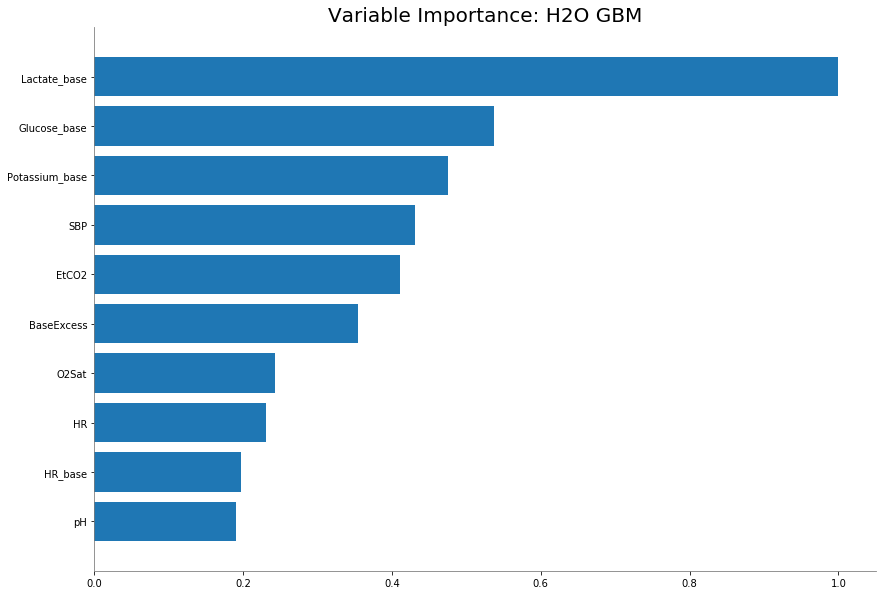

In [56]:
gbm.varimp_plot()

In [124]:
h2o_data['SepsisLabel']=h2o_data['SepsisLabel'].asfactor()
h2o_train = h2o_data[h2o_data['ID']<24000]
h2o_test = h2o_data[h2o_data['ID']>=24000]

In [134]:
h2o_train.shape

(739663, 55)

In [135]:
h2o_test.shape

(684508, 55)

In [136]:
df_train_X = h2o_train.as_data_frame()[features_final]
df_train_Y = h2o_train.as_data_frame()['SepsisLabel']
df_test_X = h2o_test.as_data_frame()[features_final]
df_test_Y = h2o_test.as_data_frame()['SepsisLabel']

In [129]:
for i in df_train_X.columns:
    m = df_train_X.loc[df_train_X[i] != np.inf, i].max()
    df_train_X[i].replace(np.inf,m,inplace=True)
    df_test_X[i].replace(np.inf,m,inplace=True)
    m = df_train_X.loc[df_train_X[i] != np.nan, i].mean()
    df_train_X[i].replace(np.nan,m,inplace=True)
    df_test_X[i].replace(np.nan,m,inplace=True)

In [138]:
for i in df_train_X.columns:
    df_train_X[i] = df_train_X[i].astype(np.float32)
    df_test_X[i]=df_test_X[i].astype(np.float32)

In [139]:
df_train_X.dtypes

HR                  float32
O2Sat               float32
Temp                float32
SBP                 float32
MAP                 float32
DBP                 float32
Resp                float32
EtCO2               float32
BaseExcess          float32
HCO3                float32
FiO2                float32
pH                  float32
PaCO2               float32
SaO2                float32
AST                 float32
BUN                 float32
Alkalinephos        float32
Calcium             float32
Chloride            float32
Creatinine          float32
Bilirubin_direct    float32
Glucose             float32
Lactate             float32
Magnesium           float32
Phosphate           float32
Potassium           float32
Bilirubin_total     float32
TroponinI           float32
Hct                 float32
Hgb                 float32
PTT                 float32
WBC                 float32
Fibrinogen          float32
Platelets           float32
Age                 float32
Gender              

In [141]:
for i in df_train_X.columns:
    m = df_train_X.loc[df_train_X[i] != -np.inf, i].min()
    df_train_X[i].replace(-np.inf,m,inplace=True)
    df_test_X[i].replace(-np.inf,m,inplace=True)


In [144]:
for i in df_train_X.columns:
    m = df_train_X.loc[df_train_X[i] != np.nan, i].mean()
    df_train_X[i].replace(np.nan,m,inplace=True)
    df_test_X[i].replace(np.nan,m,inplace=True)

In [145]:
df_train_X.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,HR_base,HR_icr,O2Sat_base,O2Sat_icr,Glucose_base,gl_icr,Lactate_base,lac_base,Potassium_base,pot_icr
count,7.396630e+05,739663.00000,739663.000000,739663.000000,739663.000000,739663.000000,739663.000000,739663.000000,0.0,739663.000000,...,739663.000000,739663.000000,739663.000000,739663.000000,739663.000000,739663.000000,739663.000000,739663.000000,739663.000000,739663.000000
mean,7.092111e+05,84.97435,97.145386,37.261047,120.891090,78.779984,59.991829,18.778883,NaN,-0.649534,...,85.642906,0.011481,97.881790,-0.007539,141.627396,0.008429,2.255783,-0.034644,4.116040,0.025380
std,4.102550e+05,16.81440,2.821007,0.525552,20.476915,14.732583,9.353361,5.296667,NaN,1.430586,...,17.910570,0.190879,3.220876,0.050522,61.995342,0.165319,1.220467,0.102324,0.661141,0.056312
min,3.700000e+01,20.00000,20.000000,20.900000,22.000000,20.000000,20.000000,1.000000,NaN,-32.000000,...,30.000000,-0.849180,25.000000,-0.800000,14.000000,-0.954430,0.300000,-0.946429,1.500000,-0.761905
25%,3.540715e+05,73.00000,96.000000,37.026726,107.000000,69.000000,57.000000,15.000000,NaN,-0.647537,...,73.500000,-0.101852,97.000000,-0.020619,106.000000,0.008445,1.900000,-0.034475,3.700000,0.025330
50%,7.082180e+05,84.00000,97.500000,37.026726,120.963989,78.000000,59.985588,18.000000,NaN,-0.647537,...,84.000000,0.000000,99.000000,-0.007543,129.000000,0.008445,2.260770,-0.034475,4.100000,0.025330
75%,1.063934e+06,95.00000,99.000000,37.026726,132.000000,87.000000,60.000000,22.000000,NaN,-0.647537,...,96.000000,0.100000,100.000000,0.000000,159.000000,0.008445,2.260770,-0.034475,4.400000,0.025330
max,1.424170e+06,280.00000,100.000000,42.220001,281.000000,300.000000,298.000000,69.000000,NaN,100.000000,...,167.500000,4.683333,100.000000,2.680000,952.000000,21.738094,27.000000,11.944445,9.900000,7.088235


In [146]:
df_train_X['BaseExcess'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: BaseExcess, dtype: float64

In [147]:
features_final = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'HCO3',\
                    'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',\
                    'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',\
                    'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender','high_temp', 'low_map', 'HR_base', \
                    'HR_icr', 'O2Sat_base', 'O2Sat_icr', 'Glucose_base', 'gl_icr', 'Lactate_base',\
                    'lac_base', 'Potassium_base', 'pot_icr']

In [149]:
df_train_X = df_train_X[features_final]
df_test_X = df_test_X[features_final]


In [150]:

classifier = GradientBoostingClassifier(max_depth = 5)
y_score = classifier.fit(df_train_X, df_train_Y).predict(df_test_X)
test_accuracy = roc_auc_score(df_test_Y, y_score)
y_score = classifier.fit(df_train_X, df_train_Y).predict(df_train_X)
train_accuracy = roc_auc_score(df_train_Y, y_score)


In [151]:
test_accuracy


0.5020764399639281

In [152]:
train_accuracy

0.5268937163893328

In [153]:
from sklearn.externals import joblib
joblib.dump(classifier, '/Users/chaocheng/GaTech/bd4h/project/feature_engineering_gbm_model.pkl', compress=9)

['/Users/chaocheng/GaTech/bd4h/project/feature_engineering_gbm_model.pkl']

In [156]:
import pandas as pd
df_X = pd.concat([df_train_X, df_test_X])

In [157]:
y_score = classifier.fit(df_train_X, df_train_Y).predict(df_X)

In [160]:
df_data = h2o_data.as_data_frame()
df_data['p1'] = y_score.tolist()

In [161]:
df_data.columns

Index([u'HR', u'O2Sat', u'Temp', u'SBP', u'MAP', u'DBP', u'Resp', u'EtCO2',
       u'BaseExcess', u'HCO3', u'FiO2', u'pH', u'PaCO2', u'SaO2', u'AST',
       u'BUN', u'Alkalinephos', u'Calcium', u'Chloride', u'Creatinine',
       u'Bilirubin_direct', u'Glucose', u'Lactate', u'Magnesium', u'Phosphate',
       u'Potassium', u'Bilirubin_total', u'TroponinI', u'Hct', u'Hgb', u'PTT',
       u'WBC', u'Fibrinogen', u'Platelets', u'Age', u'Gender', u'Unit1',
       u'Unit2', u'HospAdmTime', u'ICULOS', u'id', u'high_temp', u'low_map',
       u'HR_base', u'HR_icr', u'O2Sat_base', u'O2Sat_icr', u'Glucose_base',
       u'gl_icr', u'Lactate_base', u'lac_base', u'Potassium_base', u'pot_icr',
       u'SepsisLabel', u'ID', u'p1'],
      dtype='object')

In [162]:
df_data.to_csv('/Users/chaocheng/GaTech/bd4h/project/sklearn_gbm_with_predict.csv')

In [154]:
features_final = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3',\
                    'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',\
                    'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',\
                    'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender','high_temp', 'low_map', 'HR_base', \
                    'HR_icr', 'O2Sat_base', 'O2Sat_icr', 'Glucose_base', 'gl_icr', 'Lactate_base',\
                    'lac_base', 'Potassium_base', 'pot_icr']

h2o_train = h2o_data[h2o_data['ID']<24000]
h2o_test = h2o_data[h2o_data['ID']>=24000]
gbm = H2OGradientBoostingEstimator( quantile_alpha=0.8)
gbm.train(x=features_final, y="SepsisLabel", training_frame=h2o_train)
print(gbm.predict(h2o_test))
gbm_perf = gbm.model_performance(h2o_test)


gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.971962,0.0280385
0,0.97869,0.0213099
0,0.978837,0.0211629
0,0.978685,0.0213148
0,0.980648,0.0193525
0,0.97709,0.0229099
0,0.977275,0.0227247
0,0.96876,0.0312405
0,0.969263,0.0307369
1,0.92389,0.0761098


In [163]:
gbm_perf


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0149108003122
RMSE: 0.122109787946
LogLoss: 0.0756544097962
Mean Per-Class Error: 0.336522413287
AUC: 0.700433047681
Gini: 0.400866095362
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0301628280354: 


,0,1,Error,Rate
0,587532.0,86987.0,0.129,(86987.0/674519.0)
1,6667.0,3322.0,0.6674,(6667.0/9989.0)
Total,594199.0,90309.0,0.1368,(93654.0/684508.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0301628,0.0662426,290.0
max f2,0.0250667,0.1302911,306.0
max f0point5,0.0332701,0.0449542,281.0
max accuracy,0.9376558,0.9854012,0.0
max precision,0.5868027,0.0559441,25.0
max recall,0.0061248,1.0,399.0
max specificity,0.9376558,0.9999941,0.0
max absolute_mcc,0.0190318,0.0832322,328.0
max min_per_class_accuracy,0.0167405,0.6579059,337.0
max mean_per_class_accuracy,0.0160684,0.6634776,340.0


Gains/Lift Table: Avg response rate:  1.46 %, avg score:  2.07 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100028,0.1342615,1.6313374,1.6313374,0.0238060,0.2215282,0.0238060,0.2215282,0.0163179,0.0163179,63.1337395,63.1337395
,2,0.0200085,0.1006721,1.5308082,1.5810655,0.0223390,0.1152048,0.0230724,0.1683587,0.0153168,0.0316348,53.0808199,58.1065457
,3,0.0300011,0.0805384,1.8634312,1.6751140,0.0271930,0.0901600,0.0244449,0.1423128,0.0186205,0.0502553,86.3431178,67.5114032
,4,0.0400010,0.0669642,2.2424929,1.8169536,0.0327246,0.0733239,0.0265147,0.1250662,0.0224247,0.0726799,124.2492922,81.6953574
,5,0.0500009,0.0561393,3.2335947,2.1002735,0.0471877,0.0612288,0.0306492,0.1122991,0.0323356,0.1050155,223.3594704,110.0273522
,6,0.1000003,0.0352671,2.9833165,2.5417885,0.0435354,0.0433342,0.0370922,0.0778172,0.1491641,0.2541796,198.3316476,154.1788549
,7,0.1500012,0.0278793,2.2724599,2.4520115,0.0331619,0.0311440,0.0357821,0.0622593,0.1136250,0.3678046,127.2459912,145.2011462
,8,0.2000006,0.0236989,1.8220255,2.2945173,0.0265888,0.0256419,0.0334838,0.0531051,0.0911002,0.4589048,82.2025499,129.4517272
,9,0.3000009,0.0183112,1.5326815,2.0405720,0.0223664,0.0207550,0.0297780,0.0423217,0.1532686,0.6121734,53.2681476,104.0572007
,10,0.3999997,0.0150602,1.0421585,1.7909714,0.0152082,0.0165644,0.0261356,0.0358824,0.1042146,0.7163880,4.2158541,79.0971375


In [164]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1556196344653_325


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0203747726568
RMSE: 0.142740227885
LogLoss: 0.0941438949765
Mean Per-Class Error: 0.310554535167
AUC: 0.758138562991
Gini: 0.516277125983
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0741693557394: 


,0,1,Error,Rate
0,710221.0,13115.0,0.0181,(13115.0/723336.0)
1,13320.0,3007.0,0.8158,(13320.0/16327.0)
Total,723541.0,16122.0,0.0357,(26435.0/739663.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0741694,0.1853370,195.0
max f2,0.0431095,0.2274000,250.0
max f0point5,0.1374765,0.2428395,141.0
max accuracy,0.3477698,0.9784605,72.0
max precision,0.8916032,1.0,0.0
max recall,0.0061752,1.0,399.0
max specificity,0.8916032,1.0,0.0
max absolute_mcc,0.1513178,0.1865546,133.0
max min_per_class_accuracy,0.0224396,0.6868620,318.0
max mean_per_class_accuracy,0.0219640,0.6894455,320.0


Gains/Lift Table: Avg response rate:  2.21 %, avg score:  2.21 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100005,0.1002812,12.7144984,12.7144984,0.2806543,0.1927591,0.2806543,0.1927591,0.1271513,0.1271513,1171.4498425,1171.4498425
,2,0.0200010,0.0761961,4.8873650,8.8009317,0.1078816,0.0862122,0.1942679,0.1394857,0.0488761,0.1760274,388.7365002,780.0931713
,3,0.0300001,0.0651386,3.6935834,7.0986357,0.0815306,0.0701904,0.1566922,0.1163893,0.0369327,0.2129601,269.3583416,609.8635724
,4,0.0400006,0.0580282,3.1235039,6.1048192,0.0689469,0.0613046,0.1347551,0.1026177,0.0312366,0.2441967,212.3503948,510.4819191
,5,0.0500011,0.0530944,2.6702897,5.4178947,0.0589428,0.0554249,0.1195923,0.0931789,0.0267042,0.2709010,167.0289650,441.7894710
,6,0.1000009,0.0402394,2.3102929,3.8641148,0.0509964,0.0456978,0.0852948,0.0694386,0.1155142,0.3864151,131.0292950,286.4114837
,7,0.1500007,0.0334814,1.8178551,3.1820344,0.0401265,0.0366100,0.0702388,0.0584958,0.0908924,0.4773075,81.7855110,218.2034409
,8,0.2000005,0.0289933,1.4197399,2.7414638,0.0313387,0.0310918,0.0605139,0.0516449,0.0709867,0.5482942,41.9739941,174.1463770
,9,0.3000001,0.0232606,1.2053702,2.2294349,0.0266068,0.0259002,0.0492116,0.0430634,0.1205365,0.6688308,20.5370235,122.9434899
,10,0.3999997,0.0191885,0.9126025,1.9002279,0.0201444,0.0211412,0.0419448,0.0375828,0.0912599,0.7600906,-8.7397536,90.0227903



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-27 19:47:58,0.038 sec,0.0,0.1469228,0.1060029,0.5,0.0,1.0,0.9779264
,2019-04-27 19:47:59,0.694 sec,1.0,0.1466843,0.1046086,0.6824723,0.0623352,5.9297194,0.0833988
,2019-04-27 19:47:59,1.108 sec,2.0,0.1464967,0.1036582,0.6932521,0.0616579,6.1224353,0.0398695
,2019-04-27 19:48:00,1.543 sec,3.0,0.1463508,0.1029656,0.6942792,0.0623153,6.2255675,0.0509340
,2019-04-27 19:48:00,1.984 sec,4.0,0.1460351,0.1020711,0.7012528,0.0745691,6.5579635,0.0479786
,2019-04-27 19:48:01,2.457 sec,5.0,0.1458276,0.1014578,0.7061180,0.0760260,6.7304316,0.0464982
,2019-04-27 19:48:01,3.125 sec,6.0,0.1456510,0.1009376,0.7087737,0.0811563,6.9902644,0.0500633
,2019-04-27 19:48:02,3.714 sec,7.0,0.1454971,0.1005293,0.7100667,0.0835695,7.6271234,0.0424720
,2019-04-27 19:48:06,8.116 sec,16.0,0.1445791,0.0981233,0.7267899,0.0991755,9.4807532,0.0379876
,2019-04-27 19:48:11,12.398 sec,25.0,0.1439700,0.0965894,0.7396731,0.1120711,10.5586682,0.0367694


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Glucose_base,619.9082031,1.0,0.1819379
Lactate_base,471.2068787,0.7601236,0.1382953
Potassium_base,391.4114685,0.6314023,0.1148760
EtCO2,308.6124573,0.4978357,0.0905752
SBP,178.9988861,0.2887506,0.0525347
---,---,---,---
high_temp,1.5288950,0.0024663,0.0004487
FiO2,0.5624833,0.0009074,0.0001651
Creatinine,0.3711332,0.0005987,0.0001089
Hct,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [165]:
predit= gbm.predict(h2o_data)
final = h2o_data.cbind(predit)
h2o.export_file(final, '/Users/chaocheng/GaTech/bd4h/project/h2o_gbm_split_ID_predict.csv')

gbm prediction progress: |████████████████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%


In [166]:
modelfile = gbm.download_mojo(path="/Users/chaocheng/GaTech/bd4h/project/h2o_gbm", get_genmodel_jar=True)

In [167]:
modelfile

'/Users/chaocheng/GaTech/bd4h/project/h2o_gbm/GBM_model_python_1556196344653_325.zip'